# Data Transformation

In [1]:
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
TMDB_filename = os.path.join(os.getcwd(), "TMDB_tv_dataset_v3.csv")
df = pd.read_csv(TMDB_filename)

/var/folders/m4/60ljkntj7gs489xq6yv_ghnm0000gn/T/ipykernel_38764/3478584595.py:2: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(TMDB_filename)


## Log Transformation

In [3]:
#Since a lot of columns were made after one hot encoding, I had to reference the original numerical columns
numerical_columns = ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'popularity', 'episode_run_time']

# Apply log transformation to reduce skewness
df_log = df[numerical_columns].apply(lambda x: np.log1p(x))

In [4]:
df_log[numerical_columns].describe()

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,167059.000000,167059.000000,167059.000000,167059.000000,167059.000000,167059.000000
mean,0.756984,2.014484,0.575712,0.692656,1.030757,1.810148
std,0.495780,1.432871,1.122633,0.976512,0.895498,1.872455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693147,0.693147,0.000000,0.000000,0.470004,0.000000
50%,0.693147,1.945910,0.000000,0.000000,0.628075,0.000000
75%,0.693147,3.044522,0.693147,1.945910,1.243578,3.761200
max,5.484797,9.944629,9.992322,2.397895,8.218250,8.705000


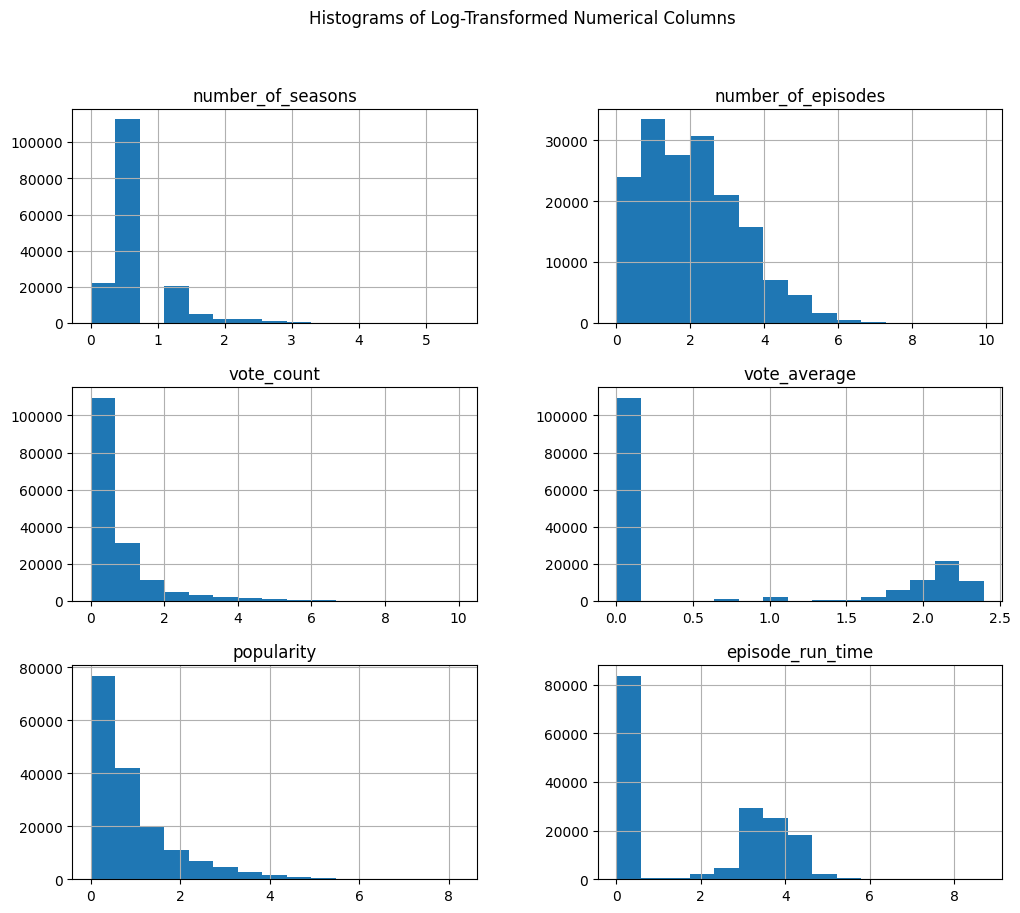

In [5]:
# Plotting histograms after log transformation
df_log.hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Log-Transformed Numerical Columns')
plt.show()


- A log transformation is a mathematical operation applied to data where each data point is replaced by its logarithm (typically base 10 or natural log).

- This transformation is particularly useful when dealing with data that spans several orders of magnitude or when the data distribution is highly skewed.

- By applying a log transformation, large values are compressed, and small values are spread out, leading to a more symmetrical (or normal) distribution.

- This can make patterns in the data more apparent and improve the performance of statistical models, especially those that assume normality or homoscedasticity (constant variance).

- Log transformation is often necessary when dealing with positively skewed data, as it stabilizes variance and reduces the impact of outliers, making the data more suitable for analysis.

In [6]:
# KDE plot for a specific column
"""
for column in df_log.columns:
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.show()
"""

"\nfor column in df_log.columns:\n    sns.kdeplot(df[column], shade=True)\n    plt.title(f'KDE Plot for {column}')\n    plt.show()\n"

In [7]:
"""
# KDE plot for a specific column
for column in df_log.columns:
    sns.kdeplot(df_log[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.show()
"""

"\n# KDE plot for a specific column\nfor column in df_log.columns:\n    sns.kdeplot(df_log[column], shade=True)\n    plt.title(f'KDE Plot for {column}')\n    plt.show()\n"

### Outliers amount changed after Log transformation

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the original data
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers in the original data as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers_original = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column for the original data
outliers_count_original = outliers_original.sum()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the log-transformed data
Q1_log = df_log[numerical_columns].quantile(0.25)
Q3_log = df_log[numerical_columns].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Define outliers in the log-transformed data
outliers_log = ((df_log[numerical_columns] < (Q1_log - 1.5 * IQR_log)) | (df_log[numerical_columns] > (Q3_log + 1.5 * IQR_log)))

# Count the number of outliers in each column for the log-transformed data
outliers_count_log = outliers_log.sum()

# Calculate the decrease in the number of outliers
outliers_decrease = outliers_count_original - outliers_count_log

# Display the results
print("Number of Outliers in each column (Non-Log Transformed):\n", outliers_count_original)
print("\nNumber of Outliers in each column (Log-Transformed):\n", outliers_count_log)
print("\nDecrease in the number of outliers after log transformation:\n", outliers_decrease)


Number of Outliers in each column (Non-Log Transformed):
 number_of_seasons     54469
number_of_episodes    16736
vote_count            26221
vote_average              0
popularity            24071
episode_run_time       2864
dtype: int64

Number of Outliers in each column (Log-Transformed):
 number_of_seasons     54469
number_of_episodes      378
vote_count            18585
vote_average              0
popularity            14531
episode_run_time          0
dtype: int64

Decrease in the number of outliers after log transformation:
 number_of_seasons         0
number_of_episodes    16358
vote_count             7636
vote_average              0
popularity             9540
episode_run_time       2864
dtype: int64


### Boxplot + Scatterplot before and after Log Transformation

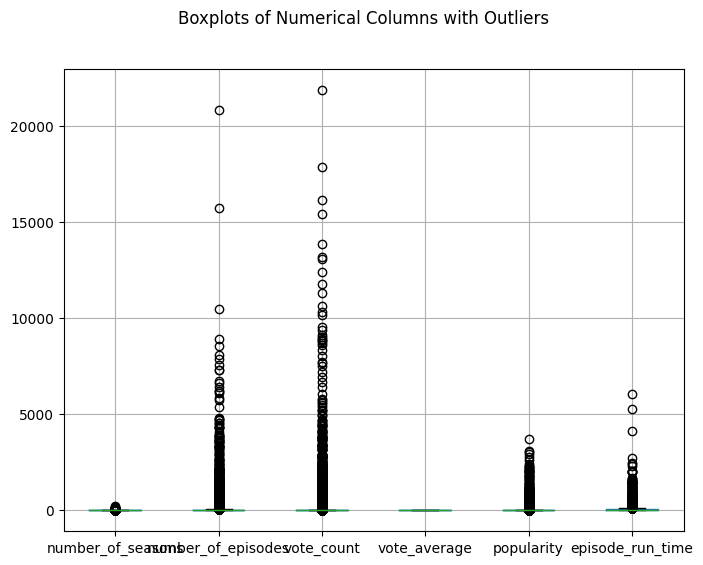

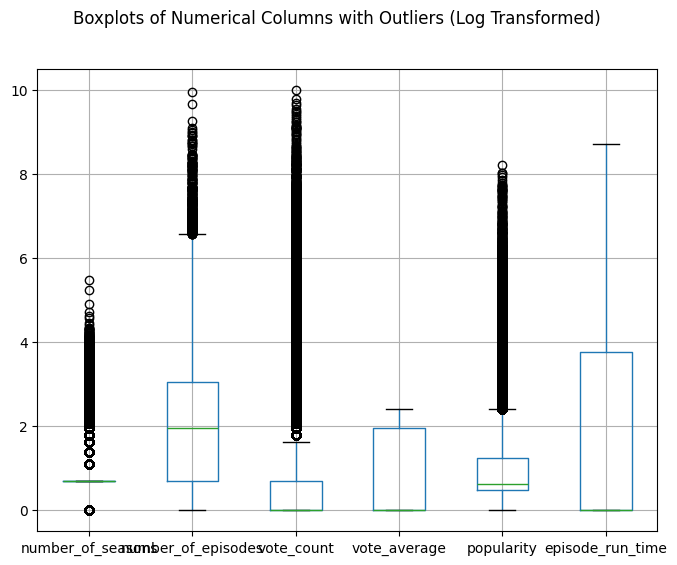

In [9]:
#Box plot
df[numerical_columns].boxplot(figsize=(8, 6))
plt.suptitle('Boxplots of Numerical Columns with Outliers')
plt.show()

df_log[numerical_columns].boxplot(figsize=(8, 6))
plt.suptitle('Boxplots of Numerical Columns with Outliers (Log Transformed)')
plt.show()

In [10]:
#I'm not sure what happened but we have to make sure there is no null values again, if we delete this there's a bug
# Fill missing values for numerical columns with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

print(df[numerical_columns].isna().sum())

# Fill missing values for numerical columns with mean (Log Transformed)
df_log[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

print(df_log[numerical_columns].isna().sum())

number_of_seasons     0
number_of_episodes    0
vote_count            0
vote_average          0
popularity            0
episode_run_time      0
dtype: int64
number_of_seasons     0
number_of_episodes    0
vote_count            0
vote_average          0
popularity            0
episode_run_time      0
dtype: int64


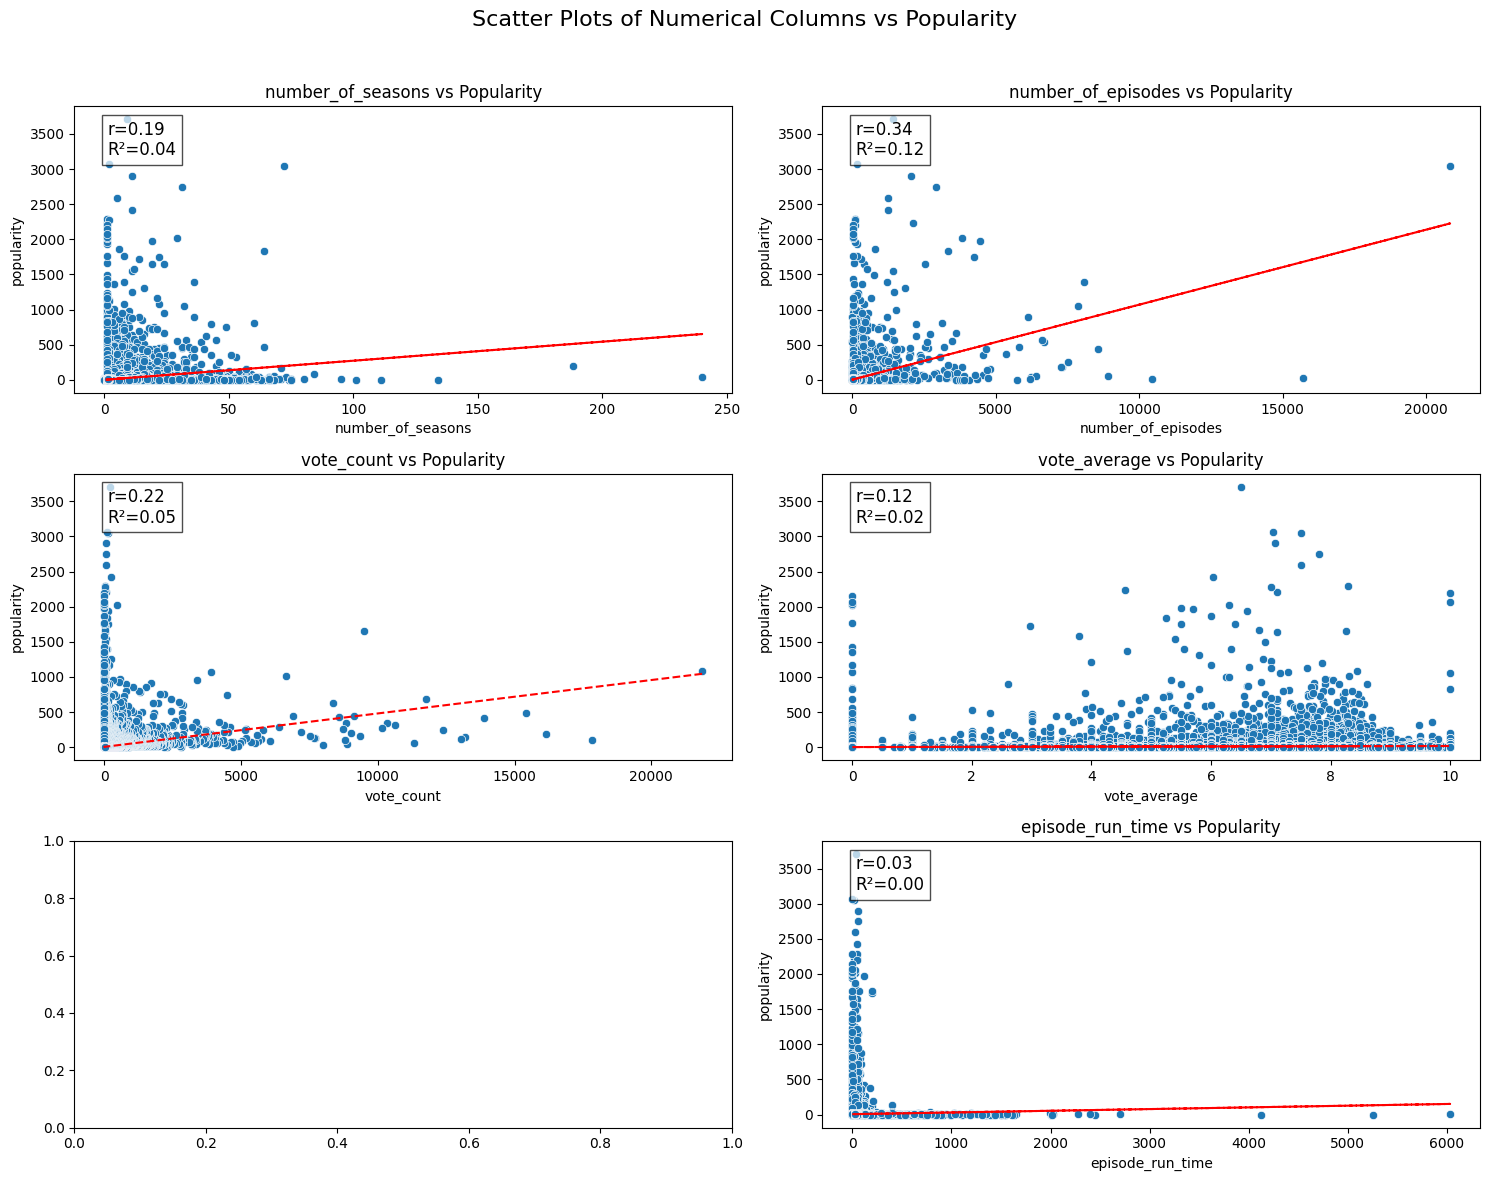

In [11]:
from sklearn.linear_model import LinearRegression

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns layout
fig.suptitle('Scatter Plots of Numerical Columns vs Popularity', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each scatter plot in a subplot
for i, col in enumerate(numerical_columns):
    if col != 'popularity':  # Skip 'popularity' as we are comparing against it
        # Calculate correlation coefficient
        corr_coef = np.corrcoef(df[col], df['popularity'])[0, 1]

        # Fit linear regression model
        X = df[col].values.reshape(-1, 1)
        y = df['popularity'].values
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r_squared = model.score(X, y)

        # Plot scatter plot
        sns.scatterplot(x=df[col], y=df['popularity'], ax=axes[i])
        # Plot trend line
        axes[i].plot(df[col], y_pred, color='red', linestyle='--')

        # Annotate with correlation coefficient and R-squared
        axes[i].text(0.05, 0.95, f'r={corr_coef:.2f}\nR²={r_squared:.2f}',
                     transform=axes[i].transAxes, fontsize=12,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

        axes[i].set_title(f'{col} vs Popularity')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('popularity')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

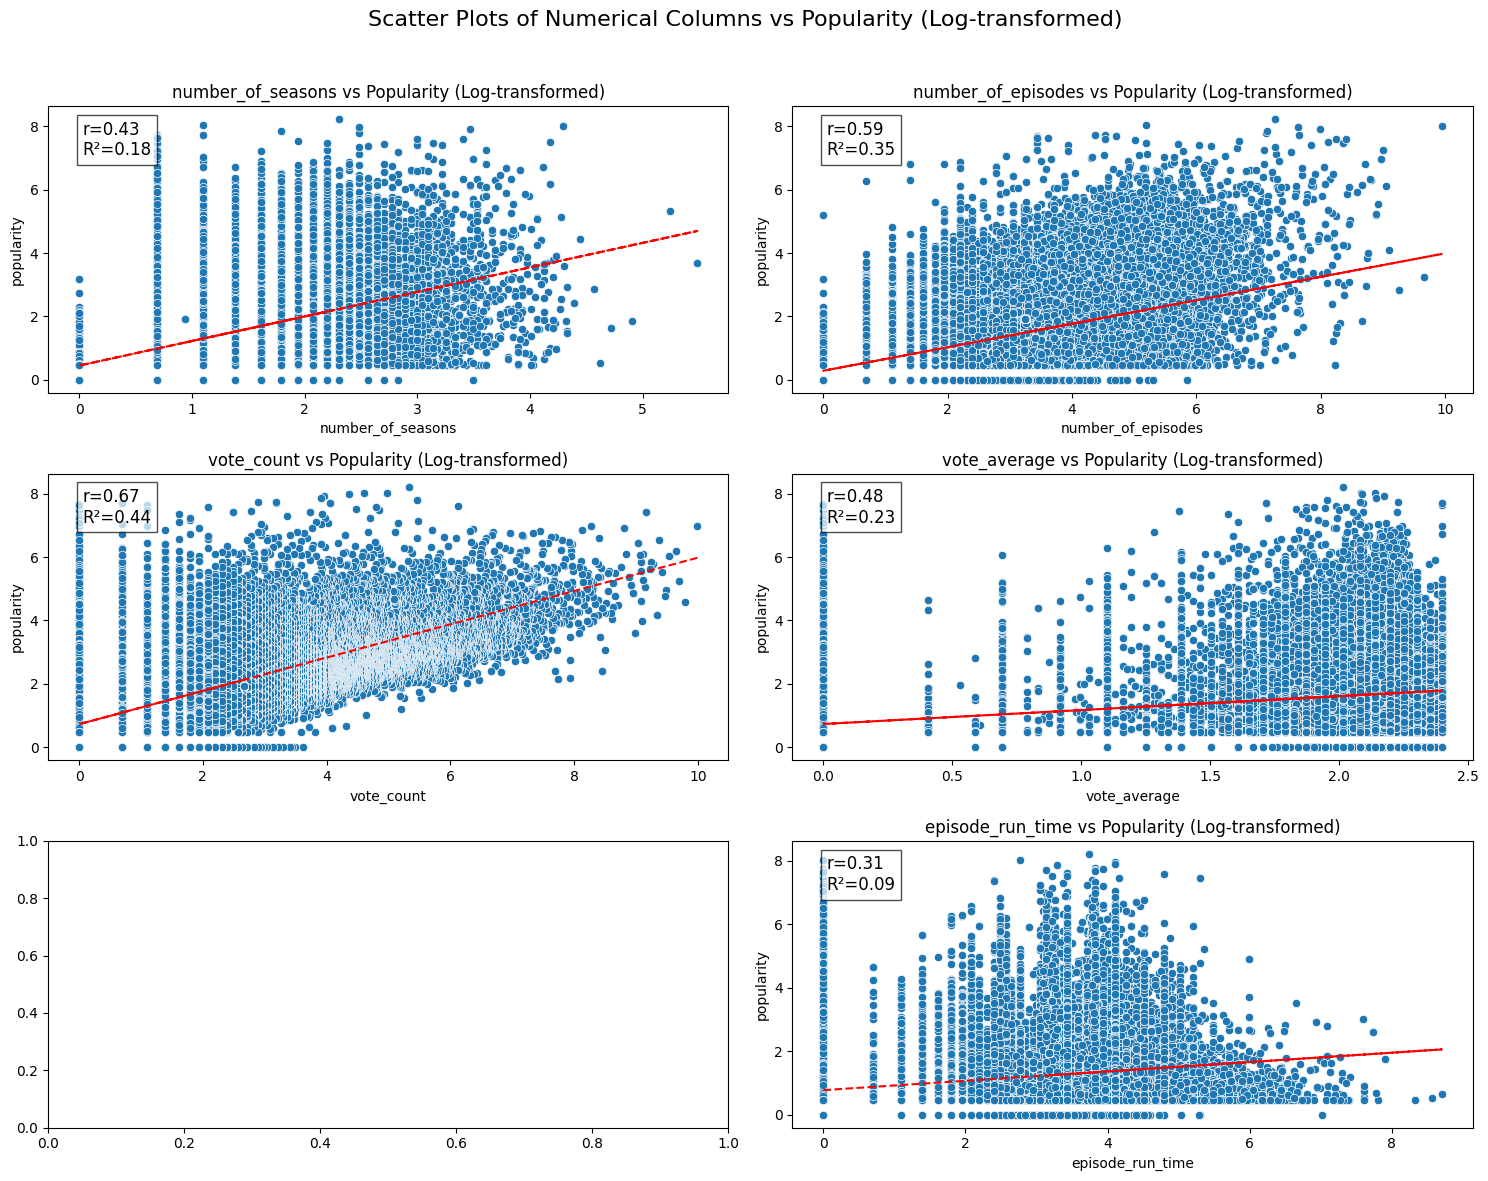

In [12]:
#LOG TRANSFORMED VALUES
numerical_columns = ['number_of_seasons', 'number_of_episodes', 'vote_count',
                     'vote_average', 'popularity', 'episode_run_time']

df_log = df[numerical_columns].apply(lambda x: np.log1p(x))

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns layout
fig.suptitle('Scatter Plots of Numerical Columns vs Popularity (Log-transformed)', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each scatter plot in a subplot
for i, col in enumerate(numerical_columns):
    if col != 'popularity':  # Skip 'popularity' as we are comparing against it
        # Calculate correlation coefficient
        corr_coef = np.corrcoef(df_log[col], df_log['popularity'])[0, 1]

        # Fit linear regression model
        X = df_log[col].values.reshape(-1, 1)
        y = df_log['popularity'].values
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r_squared = model.score(X, y)

        # Plot scatter plot
        sns.scatterplot(x=df_log[col], y=df_log['popularity'], ax=axes[i])
        # Plot trend line
        axes[i].plot(df_log[col], y_pred, color='red', linestyle='--')

        # Annotate with correlation coefficient and R-squared
        axes[i].text(0.05, 0.95, f'r={corr_coef:.2f}\nR²={r_squared:.2f}',
                     transform=axes[i].transAxes, fontsize=12,
                     verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

        axes[i].set_title(f'{col} vs Popularity (Log-transformed)')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('popularity')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Winsorize Outliers (after Log transformation)

In [13]:
from scipy.stats.mstats import winsorize

# Define the limits for Winsorization
lower_limit = 0.05  # 5th percentile
upper_limit = 0.95  # 95th percentile

# Apply Winsorization to each numerical column
df_winsorized = df_log[numerical_columns].apply(lambda x: winsorize(x, limits=(lower_limit, 1 - upper_limit)))

# Display the first few rows of the winsorized data
print(df_winsorized.head())


   number_of_seasons  number_of_episodes  vote_count  vote_average  \
0           1.609438            4.304065    2.944439      2.245168   
1           1.386294            3.737670    2.944439      2.225380   
2           1.609438            3.555348    2.944439      2.264260   
3           1.609438            4.510860    2.944439      2.210579   
4           1.609438            4.510860    2.944439      2.249817   

   popularity  episode_run_time  
0     2.96795          0.000000  
1     2.96795          4.110874  
2     2.96795          0.000000  
3     2.96795          3.761200  
4     2.96795          3.828641  


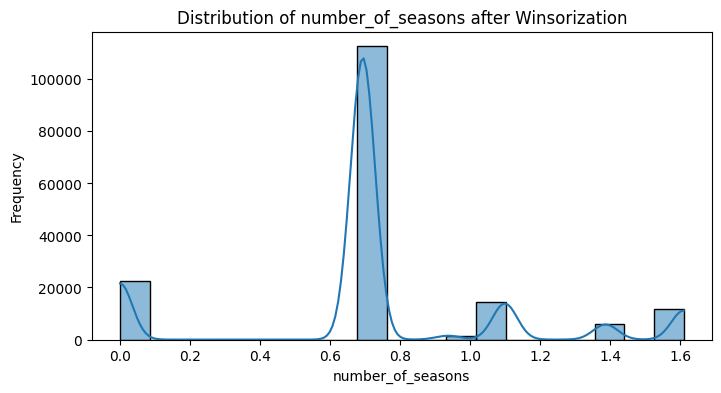

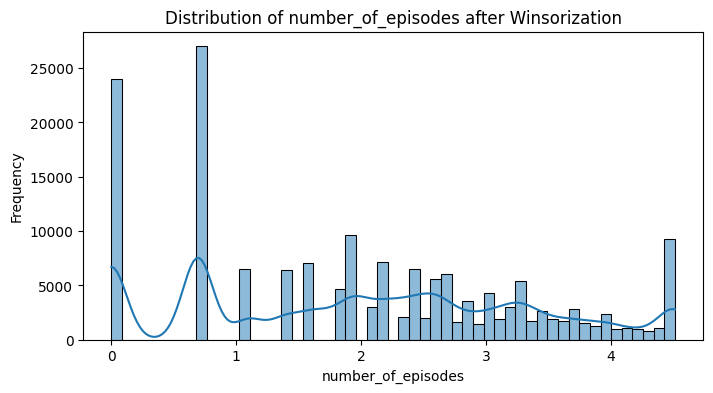

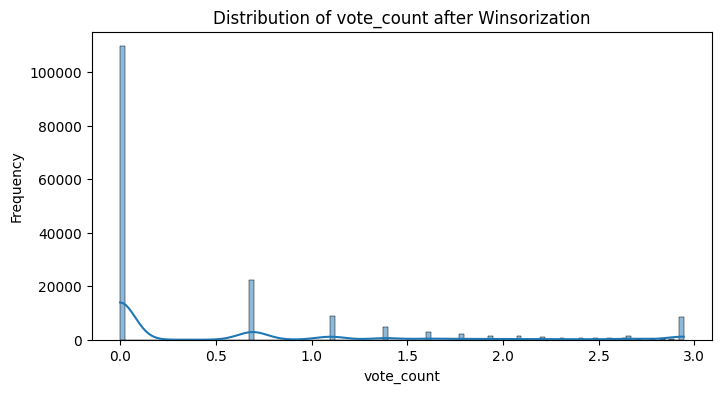

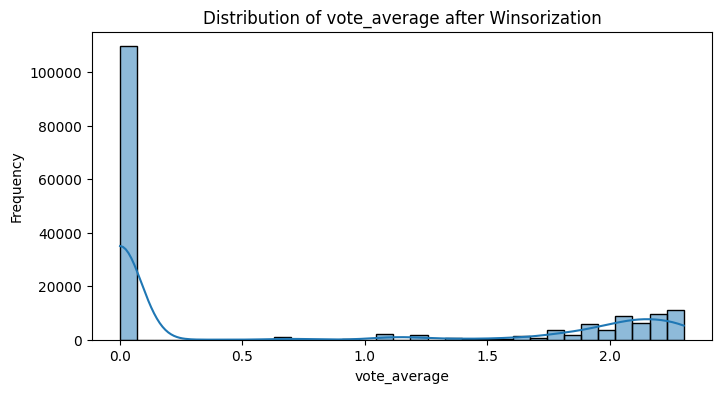

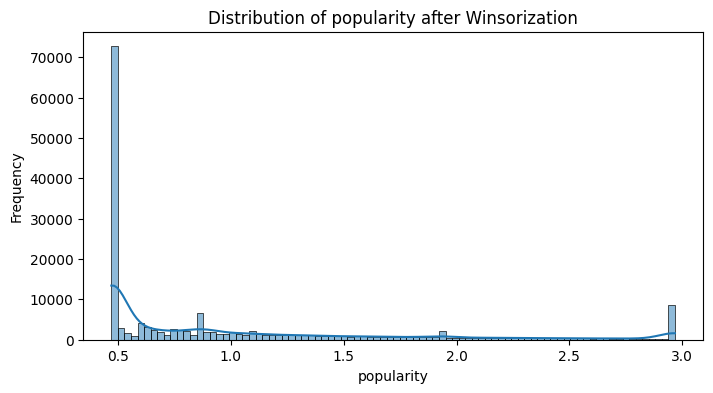

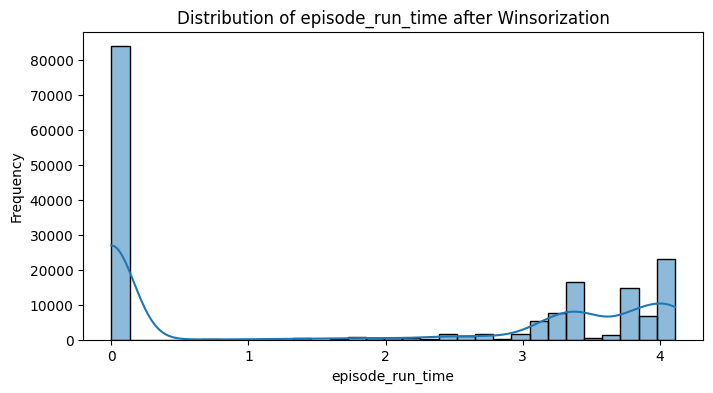

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each column in the winsorized DataFrame
for column in df_winsorized.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_winsorized[column], kde=True)
    plt.title(f'Distribution of {column} after Winsorization')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Normalization of Numerical Data


In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,id,name,number_of_seasons,number_of_episodes,vote_count,vote_average,overview,adult,backdrop_path,first_air_date,...,first_air_date_season,first_air_date_winter,first_air_date_spring,first_air_date_summer,first_air_date_fall,last_air_date_season,last_air_date_winter,last_air_date_spring,last_air_date_summer,last_air_date_fall
0,0.005565,Game of Thrones,0.033333,0.003503,1.000000,0.844200,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,...,SPRING,False,True,False,False,SPRING,False,True,False,False
1,0.284401,Money Heist,0.012500,0.001967,0.816031,0.825700,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,...,SPRING,False,True,False,False,WINTER,True,False,False,False
2,0.265636,Stranger Things,0.016667,0.001632,0.739397,0.862400,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,...,SUMMER,False,False,True,False,SUMMER,False,False,True,False
3,0.005577,The Walking Dead,0.045833,0.008494,0.706044,0.812100,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,...,FALL,False,False,False,True,FALL,False,False,False,True
4,0.251473,Lucifer,0.025000,0.004463,0.634579,0.848600,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,...,WINTER,True,False,False,False,FALL,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168588,NaN,NaN,0.006466,0.001181,0.000614,0.235399,NaN,NaN,NaN,NaN,...,UNKNOWN,False,False,False,False,UNKNOWN,False,False,False,False
168589,NaN,NaN,0.006466,0.001181,0.000614,0.235399,NaN,NaN,NaN,NaN,...,UNKNOWN,False,False,False,False,UNKNOWN,False,False,False,False
168590,NaN,NaN,0.006466,0.001181,0.000614,0.235399,NaN,NaN,NaN,NaN,...,UNKNOWN,False,False,False,False,UNKNOWN,False,False,False,False
168591,NaN,NaN,0.006466,0.001181,0.000614,0.235399,NaN,NaN,NaN,NaN,...,UNKNOWN,False,False,False,False,UNKNOWN,False,False,False,False


# Hypothesis: Predicting Popularity

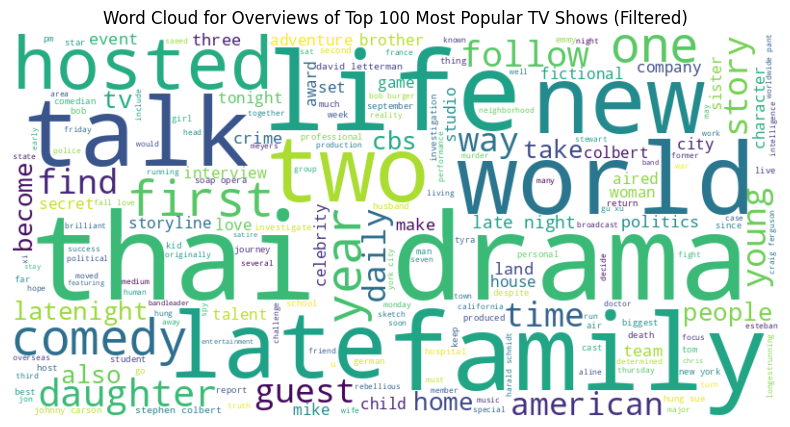

In [16]:
from wordcloud import WordCloud

top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_df_cleaned = top_100_df[top_100_df['cleaned_overview'].notna()]

text = ' '.join(top_100_df_cleaned['cleaned_overview'].astype(str))

STOPWORDS = []
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'show', 'series', 'television', 'episode', 'television series',
    'and', 'is', 'a', 'of', 'the', 'to', 'from', 'as', 'in', 'with', 'it', 'was', 'her', 'she', 'his', 'has', 'by', 'on', 'at', 'he', 'that',
    'an', 'who', 'its', 'after', 'program'
])

# Generate the word cloud for the top 50 shows
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Overviews of Top 100 Most Popular TV Shows (Filtered)')
plt.show()

In [17]:
df.to_csv("TMDB_tv_dataset_v3.csv", index=False)